In [9]:
cd C:\Users\Fatma\Desktop\Projets\optibrain_\src

C:\Users\Fatma\Desktop\Projets\optibrain_\src


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [10]:
from optibrain import SurrogateModeling

In [50]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
data = fetch_california_housing(as_frame=True)
df = data.frame
y = df[['MedHouseVal']]
X = df.drop(columns='MedHouseVal')

In [51]:
srgm = SurrogateModeling(['catboost','KRG'], 'regression')

#### Get the best model from the estimator list

In [52]:
srgm.find_best_model(X, y)

C:\Users\Fatma\Desktop\Projets\optibrain_\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [53]:
srgm.estimators_performances

catboost    0.852862
KRG             -inf
dtype: float64

In [54]:
srgm.model

In [55]:
X_test = srgm.X_test
y_test = srgm.y_test
y_pred = srgm.model.predict(X_test)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_predictions_regression(y_true, y_pred):
    """
    Affiche les résultats des prédictions pour la régression.

    :param y_true: Valeurs réelles
    :param y_pred: Valeurs prédites
    """
    if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
        y_true = y_true.values
    if isinstance(y_pred, pd.DataFrame) or isinstance(y_pred, pd.Series):
        y_pred = y_pred.values

  
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title("Régression : valeurs réelles vs. prédites")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


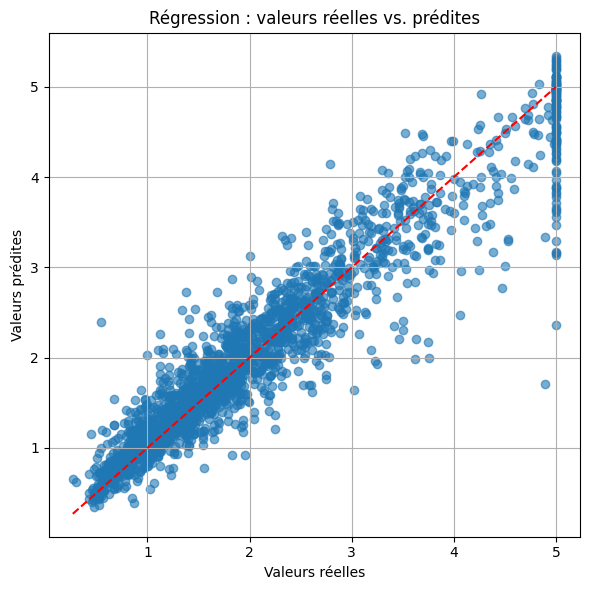

In [57]:
plot_predictions_regression(y_test, y_pred)


### Save the trained selected model

In [58]:
srgm.save("./metamodel_test", "regression_model")

Model and metadata saved to ./metamodel_test\regression_model.h5


### Add personnalized estimators

In [59]:
from optibrain.utils.kriging_model import KRGModel
from optibrain.utils.NN_model import FullNeuralNetwork

In [64]:
surrogate_model = SurrogateModeling(['NN'], 'regression')

In [65]:
surrogate_model.find_best_model(X, y, learners={"KRG": KRGModel, "NN":FullNeuralNetwork})

C:\Users\Fatma\Desktop\Projets\optibrain_\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [62]:
surrogate_model.model

In [63]:
surrogate_model.estimators_performances

catboost    0.852862
NN              -inf
dtype: float64

In [45]:
y_test = surrogate_model.y_test
X_test = surrogate_model.X_test
y_pred = surrogate_model.predict(X_test)

In [46]:
y_pred = pd.DataFrame(y_pred)

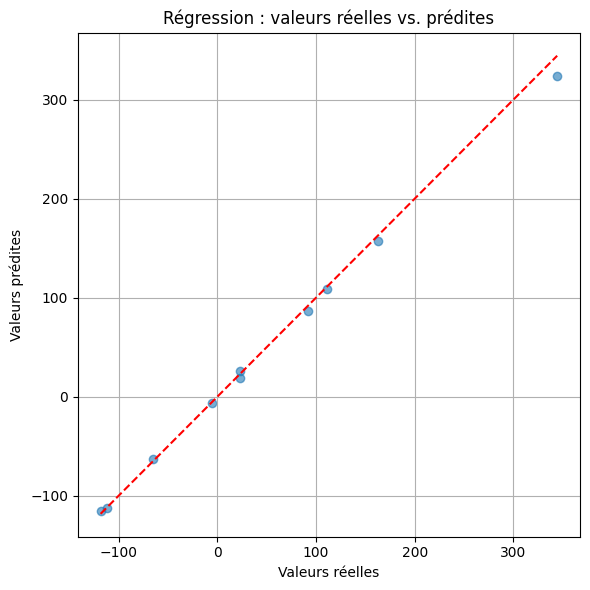

In [47]:
y_test = srgm.y_test
plot_predictions_regression(y_test, y_pred)

### Save the selected trained model

In [48]:
surrogate_model.save('./metamodel_test', 'regression_KRG')

Model and metadata saved to ./metamodel_test\regression_KRG.h5
